In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

1.1

In [50]:
df_three = pd.read_csv('three.txt', header = None, sep=" ")

In [51]:
arr_three = np.loadtxt('three.txt')
arr_eight = np.loadtxt('eight.txt')

In [52]:
arr_three.shape

(200, 256)

In [53]:
three1 = arr_three[0,:].reshape(16, 16).T
eight1 = arr_eight[0,:].reshape(16, 16).T

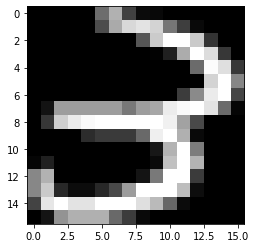

In [54]:
plt.imshow(three1, cmap = cm.gray)

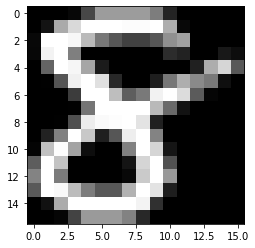

In [55]:
plt.imshow(eight1, cmap = cm.gray)

1.2

In [56]:
X = np.vstack((arr_three, arr_eight))

In [57]:
X.shape

(400, 256)

In [58]:
s_mean = np.mean(X, axis = 0)

In [59]:
s_mean.shape

(256,)

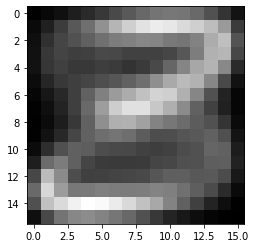

In [60]:
plt.imshow(s_mean.reshape(16,16).T, cmap = cm.gray)

1.3

In [61]:
s_mean.shape

(256,)

In [62]:
X.shape

(400, 256)

In [63]:
X_centered = X-s_mean

In [64]:
X_centered.shape

(400, 256)

In [65]:
S = np.dot(X_centered.T, X_centered)/(len(X_centered)-1)

In [66]:
S[0:5, 0:5]

array([[  59.16729323,  142.14943609,   28.68201754,   -7.17857143,
         -14.3358396 ],
       [ 142.14943609,  878.93879073,  374.13731203,   24.12778195,
         -87.12781955],
       [  28.68201754,  374.13731203, 1082.9058584 ,  555.2268797 ,
          33.72431078],
       [  -7.17857143,   24.12778195,  555.2268797 , 1181.24408521,
         777.77192982],
       [ -14.3358396 ,  -87.12781955,   33.72431078,  777.77192982,
        1429.95989975]])

In [67]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [68]:
w, v = np.linalg.eig(S)

1.4

In [69]:
#top two
w[0:2]

array([237155.24629049, 145188.35268683])

In [70]:
v[0:2]

array([[ 3.11188937e-03,  3.49231480e-03, -2.48220275e-03,
         1.18720285e-03, -1.79489868e-03,  5.06278342e-03,
        -3.10991481e-03,  2.55635608e-03,  3.52141380e-04,
        -4.97041525e-03,  7.51826548e-04,  1.94857779e-03,
         9.52219238e-04, -2.28052155e-03, -2.47191351e-03,
         7.46364693e-04,  1.76167433e-03,  1.29245354e-03,
        -7.50950985e-04, -9.80739823e-03, -8.20374512e-04,
        -3.29228671e-03, -4.15123775e-04, -7.41294705e-03,
        -1.67380448e-03,  8.07563050e-03,  4.91251489e-03,
        -2.47898899e-03, -4.23760211e-03,  2.79992728e-03,
        -4.40951773e-03, -2.65716498e-03, -8.08423595e-03,
        -6.90102149e-04, -4.45931089e-04,  6.64752180e-03,
         3.80857157e-03,  8.20538494e-04,  6.79968552e-04,
        -2.42548834e-03,  7.56206594e-03,  7.98741726e-04,
         8.98119480e-03,  1.71108638e-03, -3.23877058e-03,
         5.16004220e-03,  3.64322673e-03,  1.93965002e-03,
        -1.02883205e-03, -3.39452778e-03, -3.26213116e-0

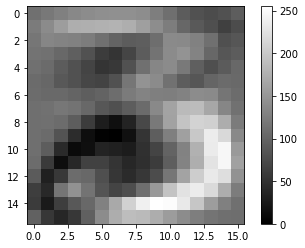

In [72]:
v0=v[:,0]
v0_scaled = (255*(v0 - min(v0))/(max(v0)-min(v0)))
v0_scaled = v0_scaled.reshape(16,16).T
plt.imshow(v0_scaled, cmap=cm.gray)
plt.colorbar()

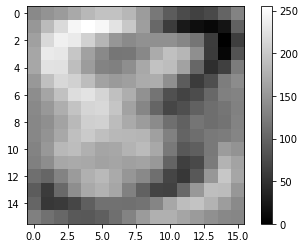

In [73]:
v1=v[:,1]
v1_scaled = (255*(v1 - min(v1))/(max(v1)-min(v1)))
v1_scaled = v1_scaled.reshape(16,16).T
plt.imshow(v1_scaled, cmap=cm.gray)
plt.colorbar()

1.5

In [74]:
V=v[:,0:2]

In [75]:
V.shape

(256, 2)

In [76]:
len(arr_three)

200

In [77]:
#proj = np.dot(X, V)
proj = X_centered.dot(V)

In [79]:
proj[0,:], proj[200,:]

(array([ 136.20872784, -242.62848028]), array([-312.68702792,  649.57346086]))

1.6

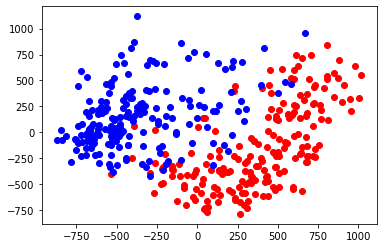

In [177]:
plt.scatter(proj[0:200,0], proj[0:200,1], color = 'r', label = 'three')
plt.scatter(proj[200:,0], proj[200:,1], color = 'b', label = 'eight')

2.1

In [7]:
alpha = 0.5
gamma = 0.8 #discount factor

Q table setup

        Move Stay
    A
    B

In [26]:
def reward(j):
    if j ==1:
        return 1
    else:
        return 0

In [15]:
dict_action = {(0,0):[(1, 0), (1,1)], (0,1):[(0, 0), (0,1)], (1,0):[(0, 0), (0,1)], (1,1):[(1, 0), (1,1)]}

In [14]:
best_action, Q_max

((1, 1), 1)

2.1

In [57]:
Q = np.zeros((2,2)) #initialize Q
i = 0 # row index for Q
j = 1 # col index for Q

for epoch in range(200):
   
    #print(ind, q)
    possible_actions = dict_action[(i,j)]
    #print(possible_actions)
    if Q[possible_actions[0]]>= Q[possible_actions[1]]: #prefer move if equal
        best_action = possible_actions[0]
        best_Q = Q[best_action]
        #print('move')
    else:
        best_action = possible_actions[1]
        best_Q = Q[best_action]
        #print('stay')
    #print(best_action, best_Q)

    Q[i, j] = (1-alpha) * Q[i, j] + alpha*(reward(j) +   gamma * best_Q)
    #print(Q)
    i = best_action[0]
    j = best_action[1]

In [58]:
Q

array([[0. , 5. ],
       [0.2, 0. ]])

2.2

In [49]:
import random

In [50]:
epsilon = 0.5

In [76]:
Q = np.zeros((2,2)) #initialize Q
i = 0 # row index for Q
j = 0 # col index for Q

for epoch in range(200):
   
    #print(ind, q)
    possible_actions = dict_action[(i,j)]
    #print(possible_actions)
    if Q[possible_actions[0]] >= Q[possible_actions[1]]:
        next_action = random.choices(possible_actions, weights=(1-epsilon, epsilon), k=1)[0]
        next_Q = Q[chosen_action]
        #print('move')
    else:
        next_action = random.choices(possible_actions, weights=(epsilon, 1-epsilon), k=1)[0]
        next_Q = Q[chosen_action]
        #print(chosen_Q, chosen_action)
        #print('stay')
    #print(best_action, best_Q)

    Q[i, j] = (1-alpha) * Q[i, j] + alpha*(reward(j) +   gamma * next_Q)
    #print(Q)
    i = next_action[0]
    j = next_action[1]

In [77]:
Q

array([[3.99236031, 4.99232348],
       [3.99236031, 4.99191345]])